# 0716325 曾正豪

In [34]:
import numpy as np
import sklearn

import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Data Generation

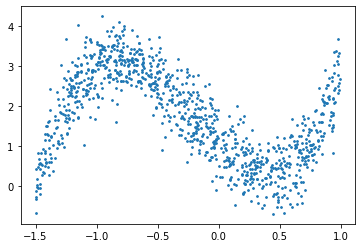

In [35]:
x = np.random.rand(1000) * 2.5 - 1.5
y = np.polyval([3, 2, -3, 1], x)+ 0.5 * np.random.randn(1000)
plt.scatter(x,y, s=3)
plt.show()

# Data Preprocessing

In [36]:
in_x = np.array(x)
in_y = np.array(y)
x = x.reshape((1000,1))
x = np.mat(x)
y = y.reshape((1000,1))
y = np.mat(y)
ploy_feature = []

for i in range(1, 5):
    poly = PolynomialFeatures(i)
    temp = poly.fit_transform(x)
    temp = np.mat(temp)
    ploy_feature.append(temp)

# Model Construction

f(x) = -0.733220553856237 +1.5566451854614471×x^1 
f(x) = -0.3217714160343146 -0.8950873987808161×x^1 +1.6969762589853334×x^2 
f(x) = 2.891236946953443 +1.8778541816202141×x^1 -2.9664541063856333×x^2 +1.0507196220903396×x^3 
f(x) = 0.09972713563819013 +2.9948809961878524×x^1 +1.7867719776921476×x^2 -3.029148708475823×x^3 +1.0622897856473887×x^4 


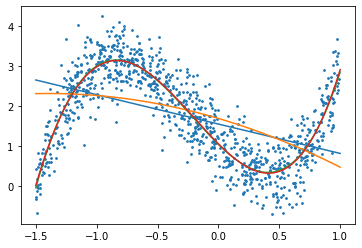

In [37]:
for i in range(1, 5):
    a = ploy_feature[i-1]
    coeff = (a.T * a).I * (a.T * y)
    coeff = np.array(coeff.T)[0]
    coeff = np.flip(coeff)
    str = f"f(x) = {coeff[0]} "
    t = 0
    for i in coeff[1:]:
        t += 1
        if i > 0:
            str += "+"
        str += f"{i}×x^{t} "
    print(str)

    draw_x = np.linspace(-1.5, 1.0, 1000)
    todraw = np.polyval(coeff, draw_x)
    plt.plot(draw_x, todraw)
plt.scatter(in_x,in_y, s=3)
plt.show()